This will show basic usage of raftel

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import raftel as rt

First, if you already have a (or a list) of s2id(s), then you you can just plot its location in the map in one single line

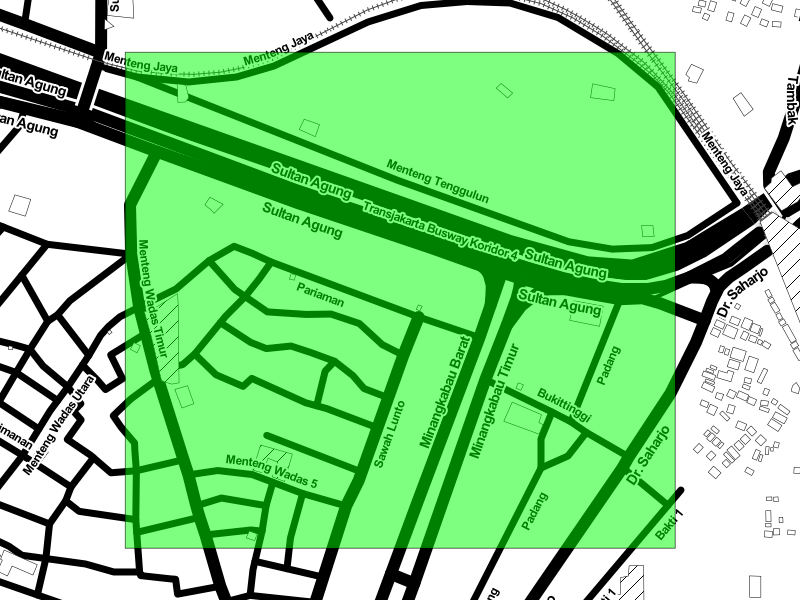

In [4]:
# Only single s2id
rt.plot_s2id([3344472973057720320])

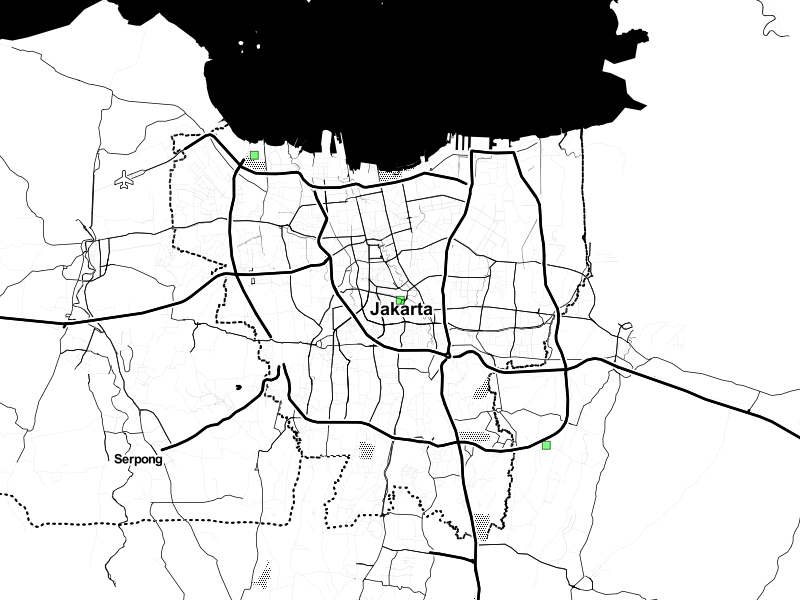

In [5]:
# or multiple s2ids
abc = [3344472973057720320, 3344517821106225152, 3344365349767217152]

rt.plot_s2id(abc)

If you only have the coordinate is latitude and longitude, then you can convert it first into s2id at any level (from 0 to 3), and then plot the result.

You can also customize the color of the cell, or send the return object from previous map by setting auto_render = False if you want to paint new cell from the same map.

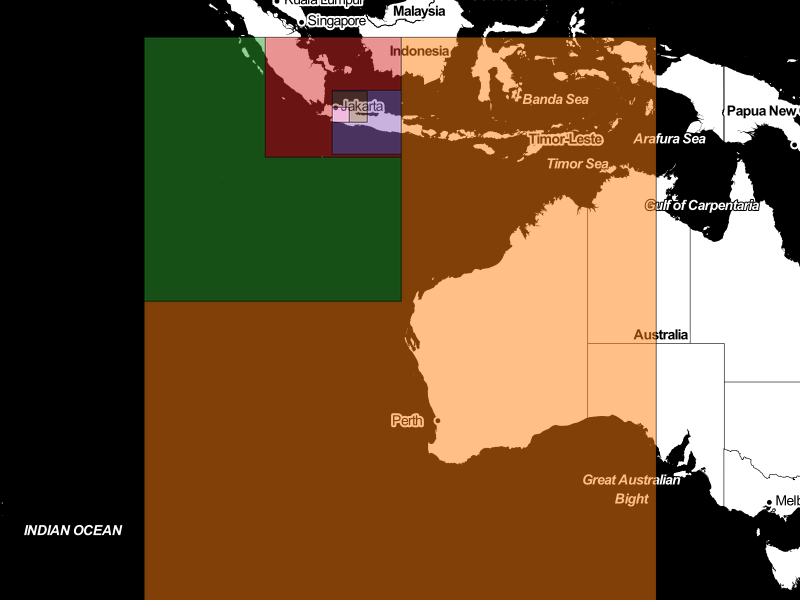

In [6]:
# Here we plot the same coordinate, somewhere in Jakarta but at different s2id level

m = None
for i in range(1, 7):
    
    lat = -6.2088
    lon = 106.8456
    
    r, g, b = (np.array(sns.color_palette("tab10")[i])*255).astype(int)
    color = '#%02x%02x%02x' % (r, g, b)

    s2id = rt.get_s2id(lat, lon, i)
    m = rt.plot_s2id([s2id], m=m, color=color, auto_render=False)
    
m.render()

Last use case is if you only know the coordinate, and want to find out what s2id level something is contained with this coordinate as the center up to certain radius (in meters), and then want to plot all of them.

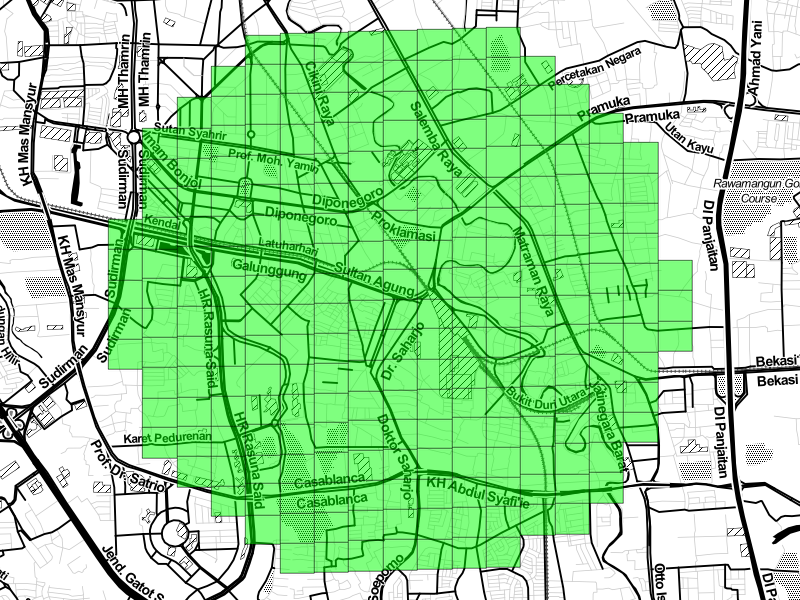

In [7]:
abc = rt.get_region(lat, lon, 2500, 15)

rt.plot_s2id(abc)

You can also select individual color of each s2id by providing a list of color instead of a single value and specify the transparency of all cells

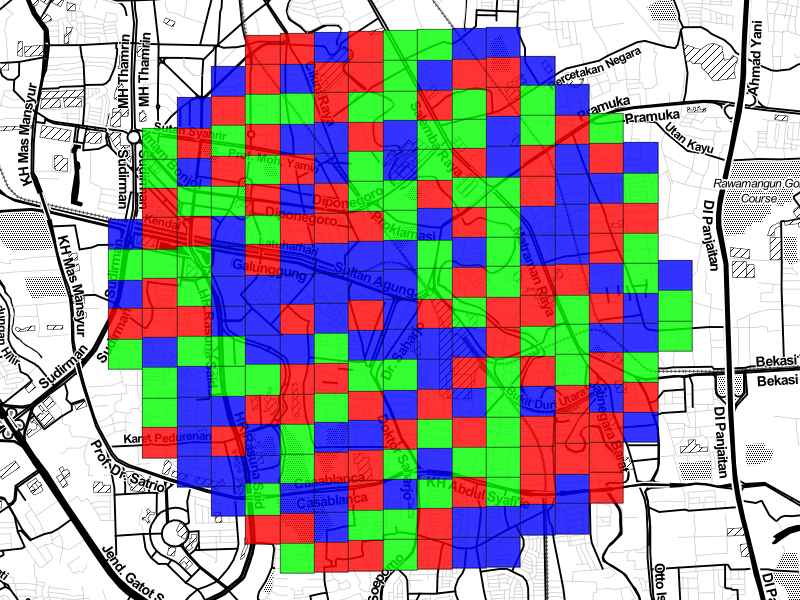

In [8]:
np.random.seed(68)

colors = np.random.choice(['#ff0000', '#00ff00', '#0000ff'], len(abc)).tolist()
rt.plot_s2id(abc, colors, alpha=0.8)